In [533]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
image_path = 'images/vertical_flip_Screen Shot 2018-06-13 at 12.10.16 AM/masks/vertical_flip_Screen Shot 2018-06-13 at 12.10.16 AM.png'
img = Image.open(image_path)
img = img.convert('RGB')
new_size = (512, 512)
predict_image = img.resize(new_size)
predict_image = predict_image.resize((128, 128))
predict_image_np = np.array(predict_image)

predict_image_np = np.expand_dims(predict_image_np, axis=0)

# for i in range (0, 128):
#     for j in range (0, 128):
#                 print(predict_image_np[0][i][j])

In [534]:
# plt.figure(figsize=(5, 5))

# title = ['Input Image']

# for i in range(len(predict_image_np)):
#     plt.subplot(1, len(predict_image_np), i+1)
#     plt.title(title[i])
#     plt.imshow(tf.keras.utils.array_to_img(predict_image_np[i]))
#     plt.axis('off')
# plt.show()

In [535]:
new_array = np.array(predict_image_np)
for i in range (128):
    for j in range (128):
        if predict_image_np[0][i][j][2] == 0:
            new_array[0][i][j][0] =  2
            new_array[0][i][j][1] = -1
            new_array[0][i][j][2] = -3
        elif predict_image_np[0][i][j][2] < 255:
            new_array[0][i][j][0] = 0
            new_array[0][i][j][1] = 0
            new_array[0][i][j][2] = 2
        elif predict_image_np[0][i][j][2] == 255:
            new_array[0][i][j][0] = -2
            new_array[0][i][j][1] = 6
            new_array[0][i][j][2] = -3


for i in range (0, 128):
    for j in range (0, 128):
                print(new_array[0][i][j])

[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 255 253]
[  2 2

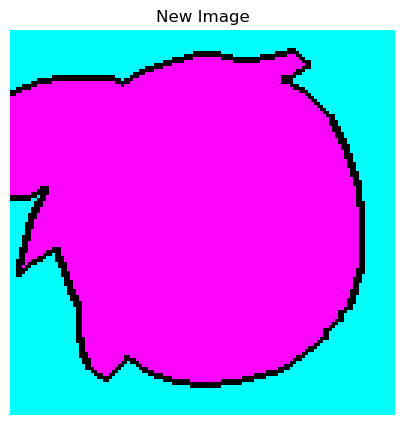

In [536]:
plt.figure(figsize=(5, 5))

title = ['New Image']

for i in range(len(new_array)):
    plt.subplot(1, len(new_array), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(new_array[i]))
    plt.axis('off')
plt.show()

In [537]:
def create_mask(pred_mask):
  pred_mask = tf.math.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]



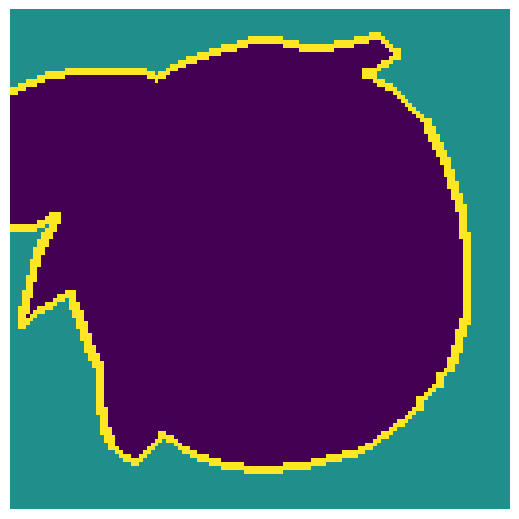

In [538]:
def display(display_list):
  plt.figure(figsize=(5, 5))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
  plt.show()

mask = create_mask(new_array)


display([mask])
plt.imsave('vertical_flip_Screen Shot 2018-06-13 at 12.10.16 AM.png', tf.keras.utils.array_to_img(mask))